# DSCI 503 - Project 03
### Felix Asare

In [1]:
# Import the following packages using the standard aliases: numpy, pandas, and matplotlib.pyplot. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part 1: Loading the Dataset; Preliminary Analysis
Loading the dataset

In [2]:
# Downloading file and printing the first 10 roles

diamonds = pd.read_csv('diamonds.txt', sep='\t')
diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


Determining the size of the dataset

In [3]:
# Print the shape of the diamonds DataFrame.
diamonds.shape

(53940, 10)

Inspecting the distribution of the dataset

In [4]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Part 2: Filtering and Sorting
Filtering and sorting the dataset

In [5]:
most_expensive = (diamonds[['price', 'carat', 'cut', 'color', 'clarity']]
                  .sort_values(by='price', ascending=False)  # Sort by price in descending order
                  .head()  # Display the first five rows
                  )
most_expensive


,price,carat,cut,color,clarity
27750,18823,2.29,Premium,I,VS2
27749,18818,2.00,Very Good,G,SI1
27748,18806,1.51,Ideal,G,IF
27747,18804,2.07,Ideal,G,SI2
27746,18803,2.00,Very Good,H,SI1


Viewing information about the 5 least expensive diamonds in the dataset.

In [6]:
least_expensive = (diamonds[['price', 'carat', 'cut', 'color', 'clarity']]
                   .sort_values(by='price', ascending=True)  # Sort by price in ascending order
                   .head()  # Display the first five rows
                   )
least_expensive

,price,carat,cut,color,clarity
1,326,0.23,Ideal,E,SI2
2,326,0.21,Premium,E,SI1
3,327,0.23,Good,E,VS1
4,334,0.29,Premium,I,VS2
5,335,0.31,Good,J,SI2


View information about the 5 largest diamonds in the dataset with an idea cut.

In [7]:
largest_ideal_cut = (diamonds[['price', 'carat', 'cut', 'color', 'clarity']]
                     .loc[diamonds['cut'] == 'Ideal']  # Filter for 'Ideal' cut
                     .sort_values(by='carat', ascending=False)  # Sort by carat in descending order
                     .head()  # Display the first five rows
                     )
largest_ideal_cut

,price,carat,cut,color,clarity
24329,12587,3.50,Ideal,H,I1
24298,12545,3.22,Ideal,I,I1
26468,16037,3.01,Ideal,J,SI2
26745,16538,3.01,Ideal,J,I1
24785,13156,2.75,Ideal,D,I1


Viewing information about the 5 largest diamonds in the dataset with an fair cut

In [8]:
largest_fair_cut = (diamonds[['price', 'carat', 'cut', 'color', 'clarity']]
                    .loc[diamonds['cut'] == 'Fair']  # Filter for 'Fair' cut
                    .sort_values(by='carat', ascending=False)  # Sort by carat in descending order
                    .head()  # Display the first five rows
                    )
largest_fair_cut

,price,carat,cut,color,clarity
27416,18018,5.01,Fair,J,I1
27631,18531,4.50,Fair,J,I1
27131,17329,4.13,Fair,H,I1
23645,11668,3.65,Fair,H,I1
26432,15964,3.40,Fair,D,I1


## Part 3: Working with Categorical Variables
creating lists to specify the order for each of the three categorical variables.

In [9]:
# Create three lists named clarity_levels, cut_levels, and color_levels. Each list should contain strings representing the levels of the associated categorical variable in order from worst to best.
clarity_levels = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
cut_levels = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_levels = ['J', 'I', 'H', 'G', 'F', 'E', 'D']

Creating a correct order for the levels of the three categorical variables.


In [10]:
# Use pd.Categorical() to set the levels of the cut, color, and clarity columns.
diamonds['cut'] = pd.Categorical(diamonds['cut'], categories=cut_levels, ordered=True)
diamonds['color'] = pd.Categorical(diamonds['color'], categories=color_levels, ordered=True)
diamonds['clarity'] = pd.Categorical(diamonds['clarity'], categories=clarity_levels, ordered=True)



Creating lists of named colors to serve as palettes to be used for
visualizations later in the notebook.

In [11]:
# Create three lists named clarity_pal, color_pal, and cut_pal. Each list should contain a number of named colors equal to the number of levels found for the associated categorical variable.
clarity_pal = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'brown', 'black']
cut_pal = ['red', 'orange', 'yellow', 'green', 'blue']
color_pal = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'brown']


## Part 4: Displaying Counts for Categorical Variables

Counting the number of diamonds for each level of cut.

In [12]:
# Without creating any new DataFrame variables, select the cut column from diamonds, and then call its value_counts() method, followed by the sort_index() method. Display the result.

diamonds['cut'].value_counts().sort_index()


cut
Fair          1610
Good          4906
Very Good    12082
Premium      13791
Ideal        21551
Name: count, dtype: int64

Counting the number of diamonds for each level of color.

In [13]:
# Without creating any new DataFrame variables, select the color column from diamonds, and then call its value_counts() method, followed by the sort_index() method. Display the result.
diamonds['color'].value_counts().sort_index()


color
J     2808
I     5422
H     8304
G    11292
F     9542
E     9797
D     6775
Name: count, dtype: int64

 Counting the number of diamonds for each level of clarity.

In [14]:
diamonds['clarity'].value_counts().sort_index()

clarity
I1        741
SI2      9194
SI1     13065
VS2     12258
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
Name: count, dtype: int64

## Part 5: Scatterplots of Price Against Carat
Exploring data with visualizations

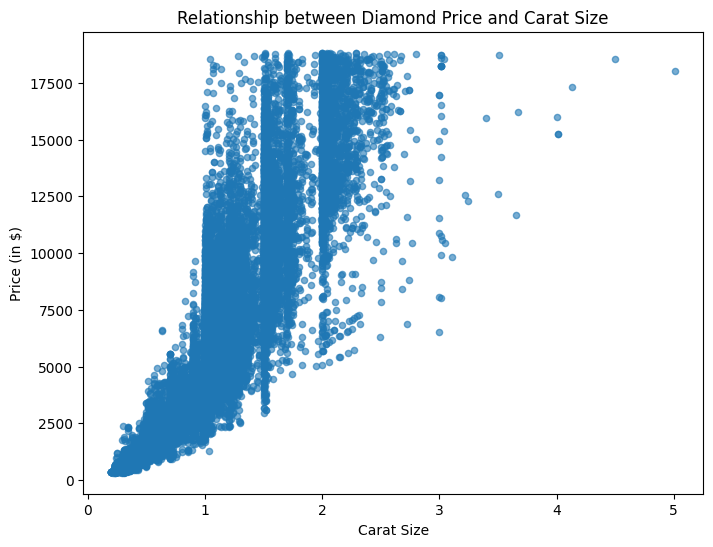

In [15]:
# Creating a scatterplot of price against carat
plt.figure(figsize=(8, 6))
plt.scatter(diamonds['carat'], diamonds['price'], alpha=0.6, s=20)
plt.xlabel('Carat Size')
plt.ylabel('Price (in $)')
plt.title('Relationship between Diamond Price and Carat Size')
plt.show()

Reproducing the plot with color according to clarity

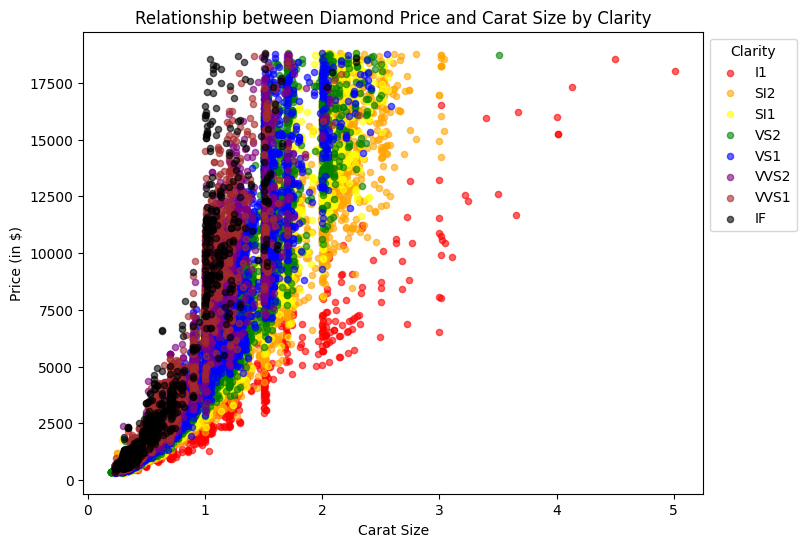

In [17]:
# Create a scatterplot of price against carat with the point color indicating the clarity level.

plt.figure(figsize=(8, 6))

for i, clarity in enumerate(clarity_levels):
    clarity_data = diamonds[diamonds['clarity'] == clarity]
    plt.scatter(clarity_data['carat'], clarity_data['price'], s=20, alpha=0.6, color=clarity_pal[i], label=clarity)


plt.xlabel('Carat Size')
plt.ylabel('Price (in $)')
plt.title('Relationship between Diamond Price and Carat Size by Clarity')
plt.legend(title='Clarity', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


Separating the points for each of the eight clarity levels into its own
subplot.

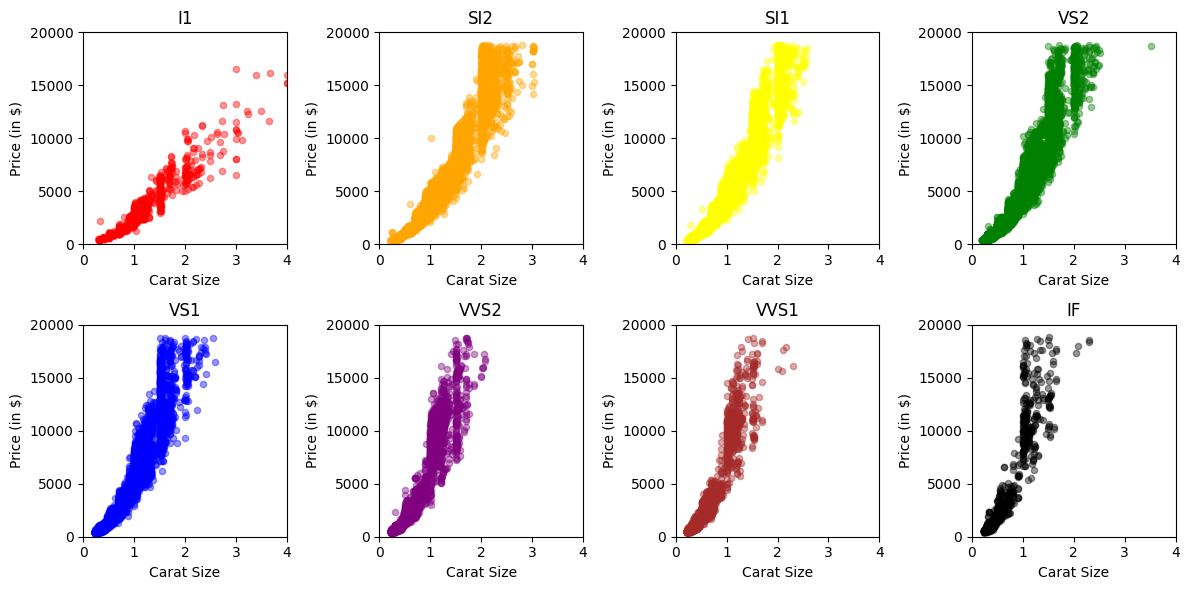

In [18]:

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

axes = axes.flatten()

# Loop over clarity levels and plot scatter for each level
for i, clarity in enumerate(clarity_levels):
    clarity_data = diamonds[diamonds['clarity'] == clarity]
    ax = axes[i]  
    
    ax.scatter(clarity_data['carat'], clarity_data['price'], s=20, alpha=0.4, color=clarity_pal[i])
    ax.set_xlabel('Carat Size')
    ax.set_ylabel('Price (in $)')
    ax.set_title(clarity)
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 20000)

plt.tight_layout()
plt.show()

## Part 6: Applying Logarithmic Transformations

Adding two new columns to the diamonds in order to store the transformed variables.

In [19]:
# Adding new columns ln_carat and ln_price to the diamonds DataFrame that contain the natural logarithm of the carat and price columns, respectively.
diamonds['ln_carat'] = np.log(diamonds['carat'])
diamonds['ln_price'] = np.log(diamonds['price'])

Histograms to explore the distribution of the diamond prices, and
the log of the diamond prices.

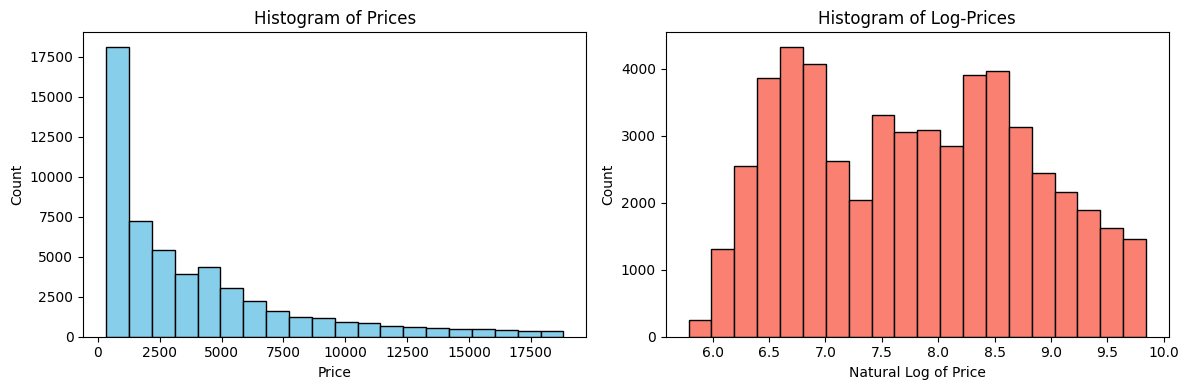

In [20]:
# Display two side-by-side histograms. The histogram on the left should be for price and the one on the right should befor ln_price.

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))


ax1.hist(diamonds['price'], bins=20, edgecolor='black', color='skyblue')
ax1.set_xlabel('Price')
ax1.set_ylabel('Count')
ax1.set_title('Histogram of Prices')

ax2.hist(diamonds['ln_price'], bins=20, edgecolor='black', color='salmon')
ax2.set_xlabel('Natural Log of Price')
ax2.set_ylabel('Count')
ax2.set_title('Histogram of Log-Prices')

plt.tight_layout()
plt.show()


Histograms to explore the distribution of the carat sizes, and the
log of the carat sizes.

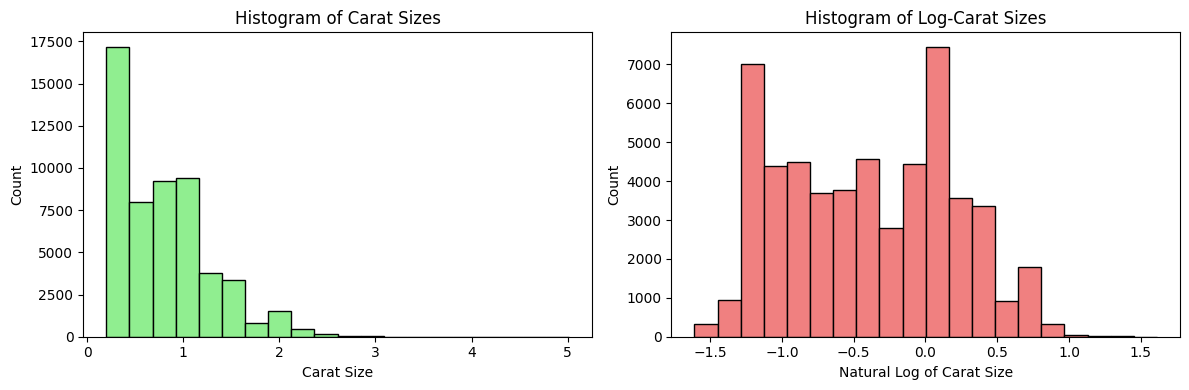

In [22]:
# Side by side histograms for carat and ln_carat

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))


ax1.hist(diamonds['carat'], bins=20, edgecolor='black', color='lightgreen')
ax1.set_xlabel('Carat Size')
ax1.set_ylabel('Count')
ax1.set_title('Histogram of Carat Sizes')


ax2.hist(diamonds['ln_carat'], bins=20, edgecolor='black', color='lightcoral')
ax2.set_xlabel('Natural Log of Carat Size')
ax2.set_ylabel('Count')
ax2.set_title('Histogram of Log-Carat Sizes')

plt.tight_layout()
plt.show()

## Part 7: Scatterplot of Transformed Variables
Creating a scatterplot of ln_price against ln_carat, with points colored according to their
clarity.

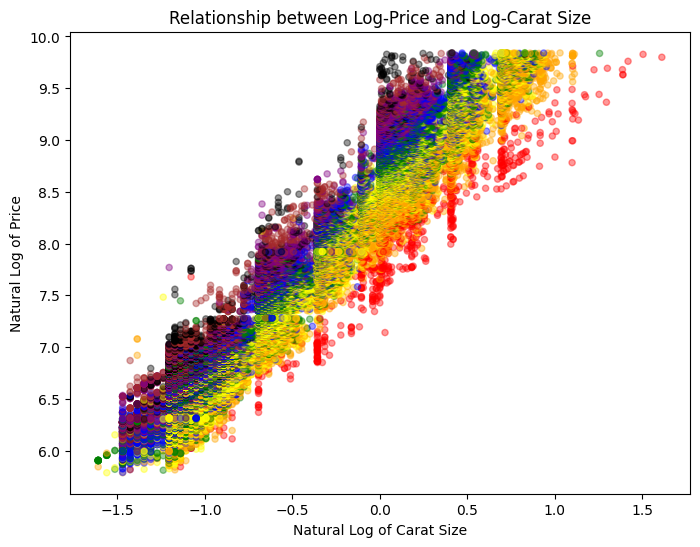

In [23]:
# Recreating the second figure from part 5

plt.figure(figsize=(8, 6))
plt.scatter(diamonds['ln_carat'], diamonds['ln_price'], s=20, alpha=0.4, c=diamonds['clarity'].apply(lambda x: clarity_pal[clarity_levels.index(x)]), edgecolor=None)
plt.xlabel('Natural Log of Carat Size')
plt.ylabel('Natural Log of Price')
plt.title('Relationship between Log-Price and Log-Carat Size')

plt.show()

## Part 8: Grouping by Cut

Creating a grouped DataFrame displaying the mean price and carat size for each cut level

In [24]:
# Create a new DataFrame named gb_cut as follows: Select the cut, price, and carat columns from diamonds, group the result by cut, and then calculate the grouped mean
gb_cut = diamonds[['cut', 'price', 'carat']].groupby('cut').mean()
gb_cut

/var/folders/39/v7bfkjx93mb3r_rh7bjkjtl00000gn/T/ipykernel_1170/3211402598.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gb_cut = diamonds[['cut', 'price', 'carat']].groupby('cut').mean()


,price,carat
cut,,
Fair,4358.757764,1.046137
Good,3928.864452,0.849185
Very Good,3981.759891,0.806381
Premium,4584.257704,0.891955
Ideal,3457.541970,0.702837


Bar charts to graphically display the information from the
DataFrame above.

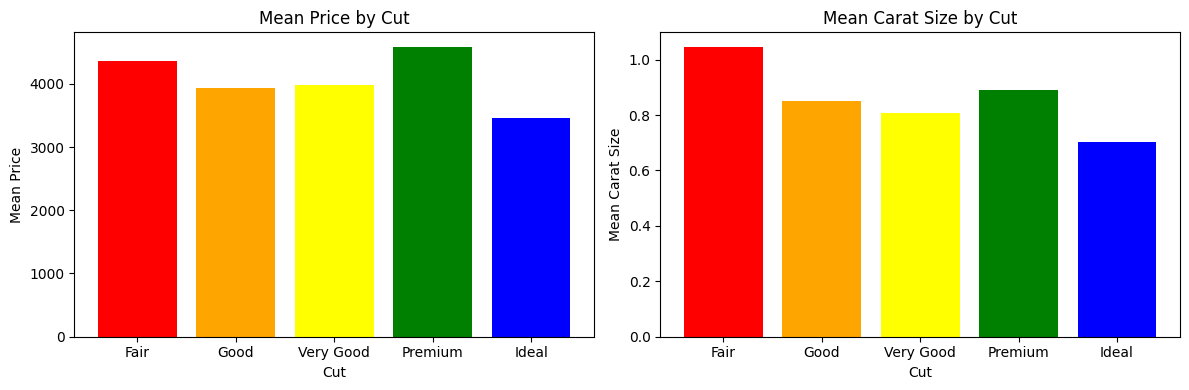

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot mean price by cut
ax1.bar(gb_cut.index, gb_cut['price'], color=cut_pal)   
ax1.set_xlabel('Cut')
ax1.set_ylabel('Mean Price')
ax1.set_title('Mean Price by Cut')

# Plot mean carat size by cut
ax2.bar(gb_cut.index, gb_cut['carat'], color=cut_pal)
ax2.set_xlabel('Cut')
ax2.set_ylabel('Mean Carat Size')
ax2.set_title('Mean Carat Size by Cut')

plt.tight_layout()
plt.show()



## Part 9: Grouping by Color

Creating a grouped DataFrame displaying the mean price and carat size for each color level.

In [26]:
# Create a new DataFrame named gb_color as follows: Select the color, price, and carat columns from diamonds, group the result by color, and then calculate the grouped means.
gb_color = diamonds[['color', 'price', 'carat']].groupby('color').mean()
gb_color

/var/folders/39/v7bfkjx93mb3r_rh7bjkjtl00000gn/T/ipykernel_1170/347388298.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gb_color = diamonds[['color', 'price', 'carat']].groupby('color').mean()


,price,carat
color,,
J,5323.818020,1.162137
I,5091.874954,1.026927
H,4486.669196,0.911799
G,3999.135671,0.771190
F,3724.886397,0.736538
E,3076.752475,0.657867
D,3169.954096,0.657795


Bar charts to graphically display the information from the
DataFrame above.

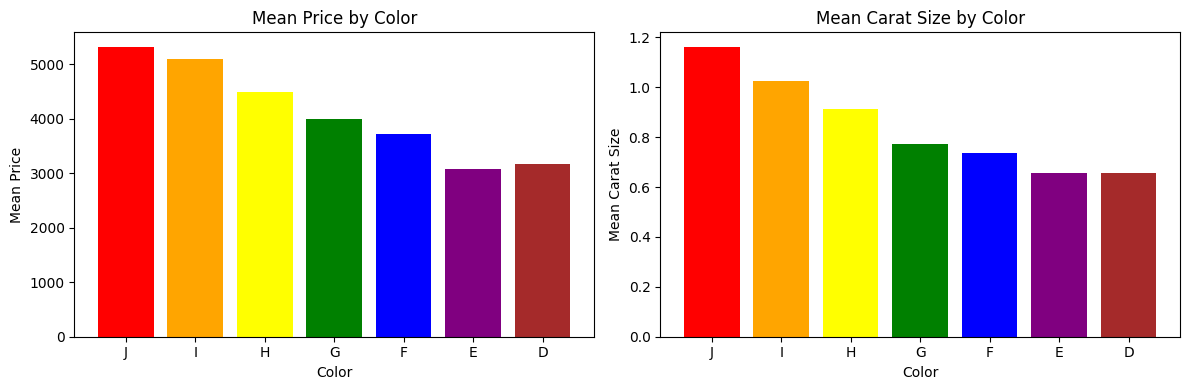

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot mean price by color
ax1.bar(gb_color.index, gb_color['price'], color=color_pal)
ax1.set_xlabel('Color')
ax1.set_ylabel('Mean Price')
ax1.set_title('Mean Price by Color')

# Plot mean carat size by color
ax2.bar(gb_color.index, gb_color['carat'], color=color_pal)
ax2.set_xlabel('Color')
ax2.set_ylabel('Mean Carat Size')
ax2.set_title('Mean Carat Size by Color')

plt.tight_layout()
plt.show()


## Part 10: Grouping by Clarity

Creating a grouped DataFrame displaying the mean price and carat size for each clarity level.

In [28]:
# Create a new DataFrame named gb_clarity as follows: Select the clarity, price, and carat columns from diamonds, group the result by clarity, and then calculate the grouped means.
gb_clarity = diamonds[['clarity', 'price', 'carat']].groupby('clarity').mean()
gb_clarity

/var/folders/39/v7bfkjx93mb3r_rh7bjkjtl00000gn/T/ipykernel_1170/2288210668.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gb_clarity = diamonds[['clarity', 'price', 'carat']].groupby('clarity').mean()


,price,carat
clarity,,
I1,3924.168691,1.283846
SI2,5063.028606,1.077648
SI1,3996.001148,0.850482
VS2,3924.989395,0.763935
VS1,3839.455391,0.727158
VVS2,3283.737071,0.596202
VVS1,2523.114637,0.503321
IF,2864.839106,0.505123


Bar charts to graphically display the information from the DataFrame above.

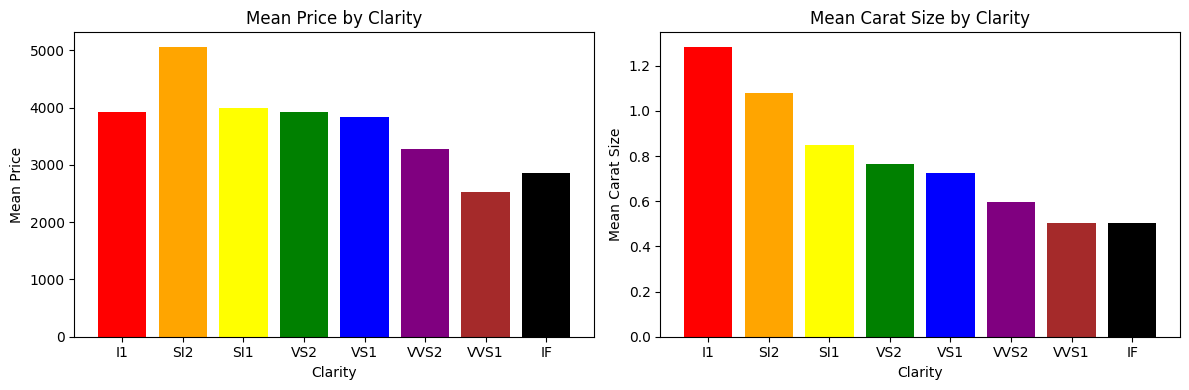

In [29]:
# Create a figure containing two side-by-side bar charts. Each chart should have a bar for every level of clarity. 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot mean price by clarity
ax1.bar(gb_clarity.index, gb_clarity['price'], color=clarity_pal)
ax1.set_xlabel('Clarity')
ax1.set_ylabel('Mean Price')
ax1.set_title('Mean Price by Clarity')

# Plot mean carat size by clarity
ax2.bar(gb_clarity.index, gb_clarity['carat'], color=clarity_pal)
ax2.set_xlabel('Clarity')
ax2.set_ylabel('Mean Carat Size')
ax2.set_title('Mean Carat Size by Clarity')

plt.tight_layout()
plt.show()